# Matplotlib and Seaborn 

**To understand the data we need to create Data Visualizations, so that we can interpret and take actions**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**https://matplotlib.org/**

**https://seaborn.pydata.org/**

**Exploratory Data Analysis**

    1) Univariate Analysis - When we are analysing only single variable, for example What's the age distribution i.e. Numerical feature, How many males and females are there? i.e. Categorical feature
    
    2) Bivariate Analysis - When we are analysing two variables, for example What's the relationship between Salary and Experience (Two numerical features), Average salary by Gender (One numerical and One categorical) 
    
    3) Multivariate Analysis - When we are analysing three or more than three features, What's the relationship between Experience and Salary by Gender (2 Numerical and 1 Categorical), What's the sales by category and Segment (Two categorical and one numerical) 

In [4]:
dataset = pd.read_csv(r'E:\SmartCube\End to End Code\Python_Credit_Risk_XTrain.csv')

In [5]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [6]:
type(dataset)

pandas.core.frame.DataFrame

**Number of records**

In [7]:
len(dataset)

614

**Number of columns**

In [9]:
len(dataset.columns)

13

**Number of null values in the dataframe**

In [10]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Structure of the dataframe**

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


**Gives the numerical column details**

In [12]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [17]:
import numpy as np
dataset.groupby('Gender').agg({'ApplicantIncome':np.mean})

,ApplicantIncome
Gender,
Female,4643.473214
Male,5446.460123


In [19]:
for i,data in dataset.groupby('Gender'):
    print(i,data['ApplicantIncome'].mean())

Female 4643.473214285715
Male 5446.460122699386


# Matplotlib

**We cannot use dataframe directly, we can use either series i.e. slice of a dataframe column, lists, tuples, sets or dictionaries**

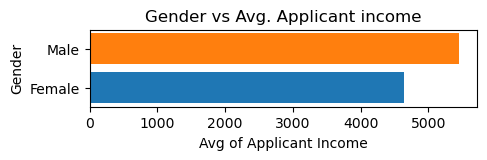

In [23]:
plt.figure(figsize=(5,1))
for i,data in dataset.groupby('Gender'):
    plt.barh(i,data['ApplicantIncome'].mean())
    plt.xlabel('Avg of Applicant Income')
    plt.ylabel('Gender')
    plt.title('Gender vs Avg. Applicant income')

In [25]:
dataset['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [28]:
property_dict = dict()
for i in set(dataset['Property_Area']):
    property_dict[i] = dataset[dataset['Property_Area']==i].Loan_ID.count()
    

<BarContainer object of 3 artists>

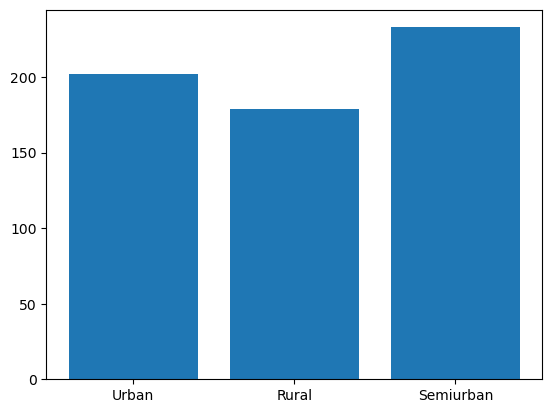

In [30]:
plt.bar(property_dict.keys(),property_dict.values())

<AxesSubplot:ylabel='Property_Area'>

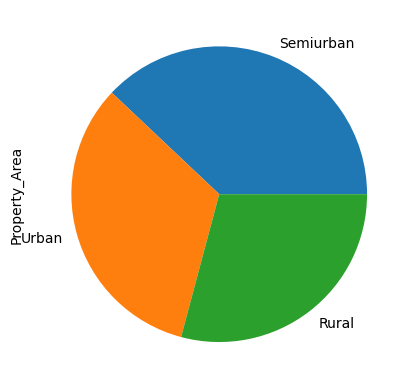

In [34]:
dataset["Property_Area"].value_counts().plot.pie()

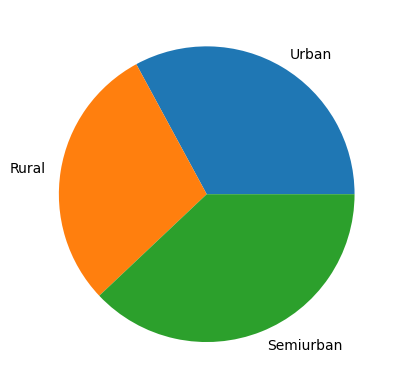

In [32]:
plt.pie(property_dict.values(),labels=property_dict.keys())
plt.show()

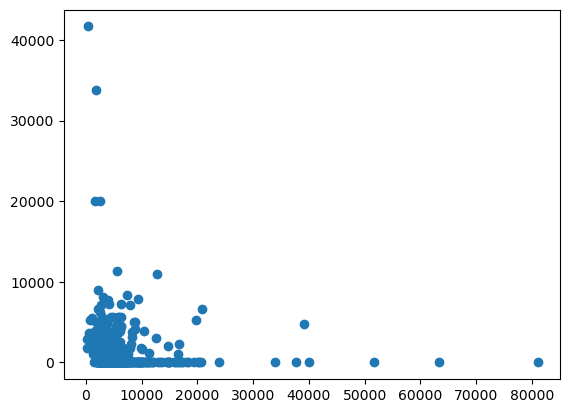

In [35]:
plt.scatter(dataset['ApplicantIncome'], dataset['CoapplicantIncome'])

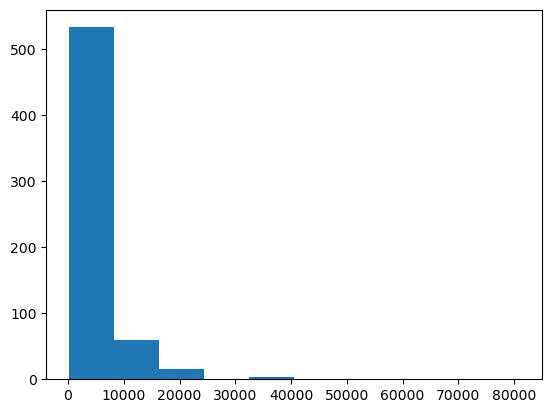

In [37]:
plt.hist(dataset['ApplicantIncome'])
plt.show()

# Seaborn

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome'>

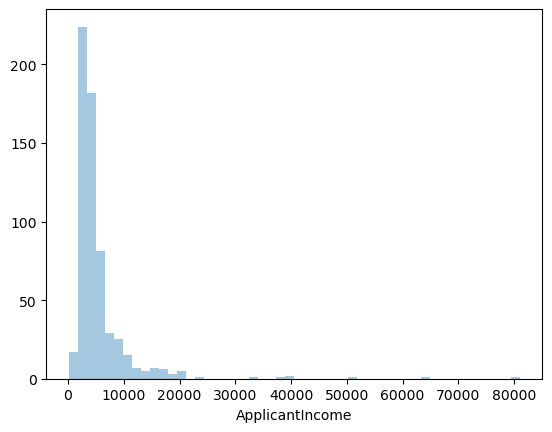

In [42]:
sns.distplot(dataset['ApplicantIncome'],kde=False)

In [40]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


<AxesSubplot:xlabel='Gender', ylabel='count'>

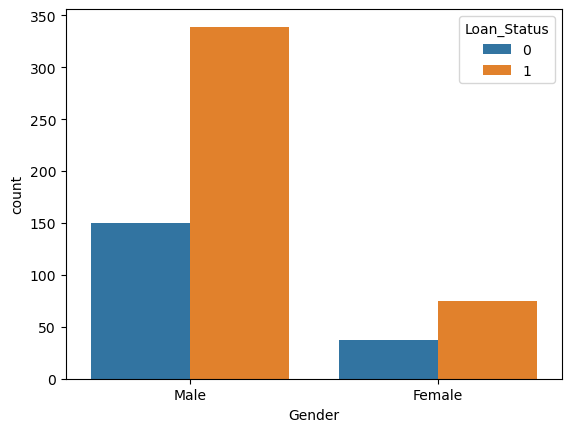

In [44]:
sns.countplot(data = dataset, x = 'Gender',hue='Loan_Status')

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

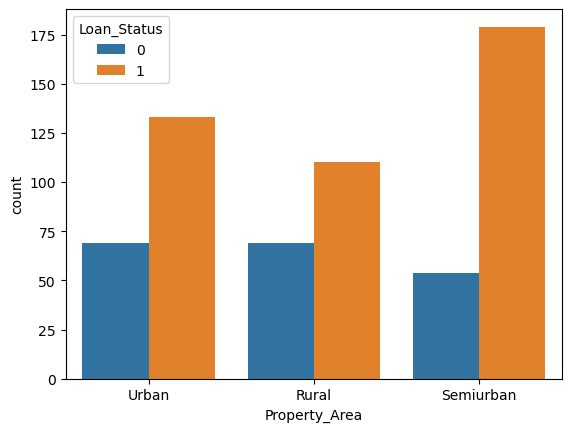

In [45]:
sns.countplot(data = dataset, x = 'Property_Area',hue='Loan_Status')

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

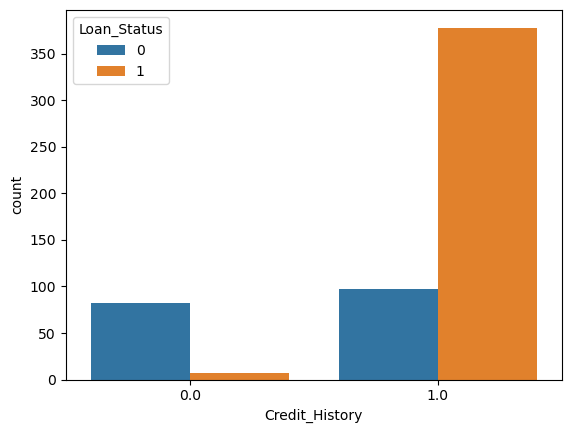

In [46]:
sns.countplot(data = dataset, x = 'Credit_History',hue='Loan_Status')

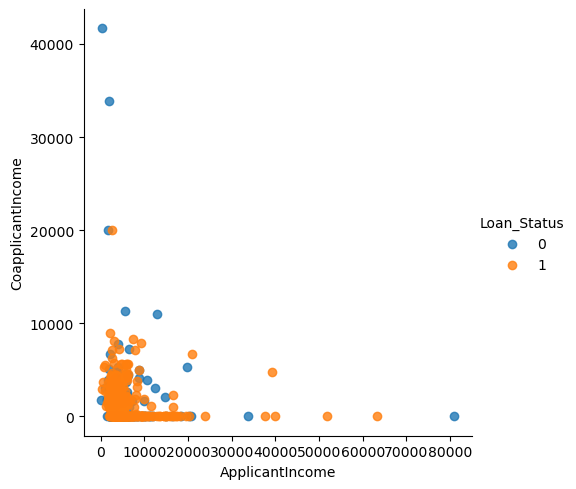

In [48]:
sns.lmplot(data=dataset, x='ApplicantIncome', y='CoapplicantIncome', hue='Loan_Status',fit_reg=False)

In [50]:
dataset['Total_Income'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']

In [53]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1,7583.0


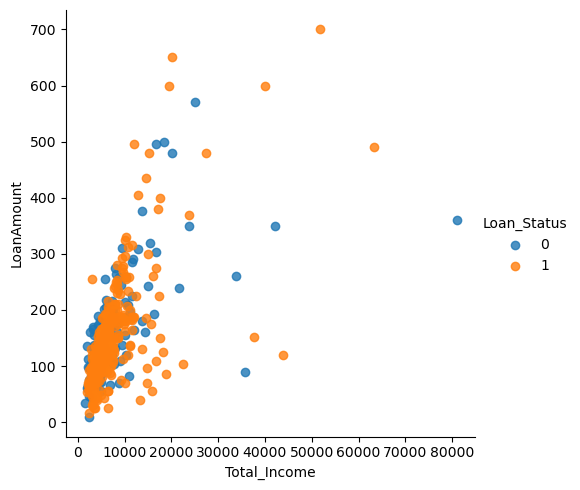

In [55]:
sns.lmplot(data=dataset, x='Total_Income', y='LoanAmount', hue='Loan_Status',fit_reg=False)

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

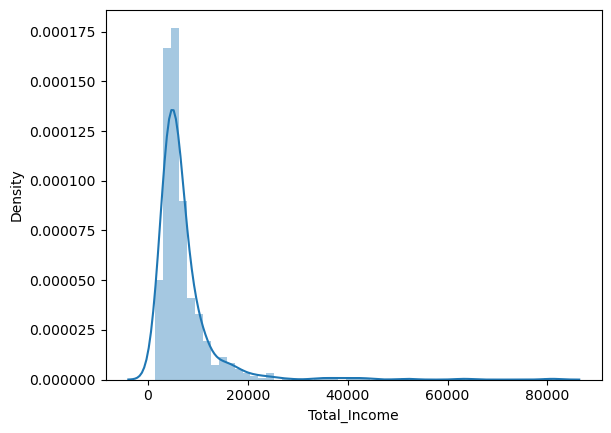

In [58]:
sns.distplot(dataset['Total_Income'])

In [60]:
dataset_cars = pd.read_csv(r'E:\Courses\Python Basics to Advanced\Car_sales.csv')

<AxesSubplot:>

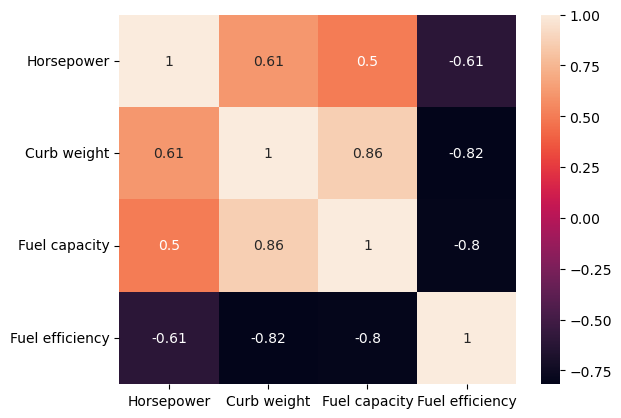

In [65]:
sns.heatmap(dataset_cars[['Horsepower','Curb weight', 'Fuel capacity','Fuel efficiency']].corr(),annot=True)

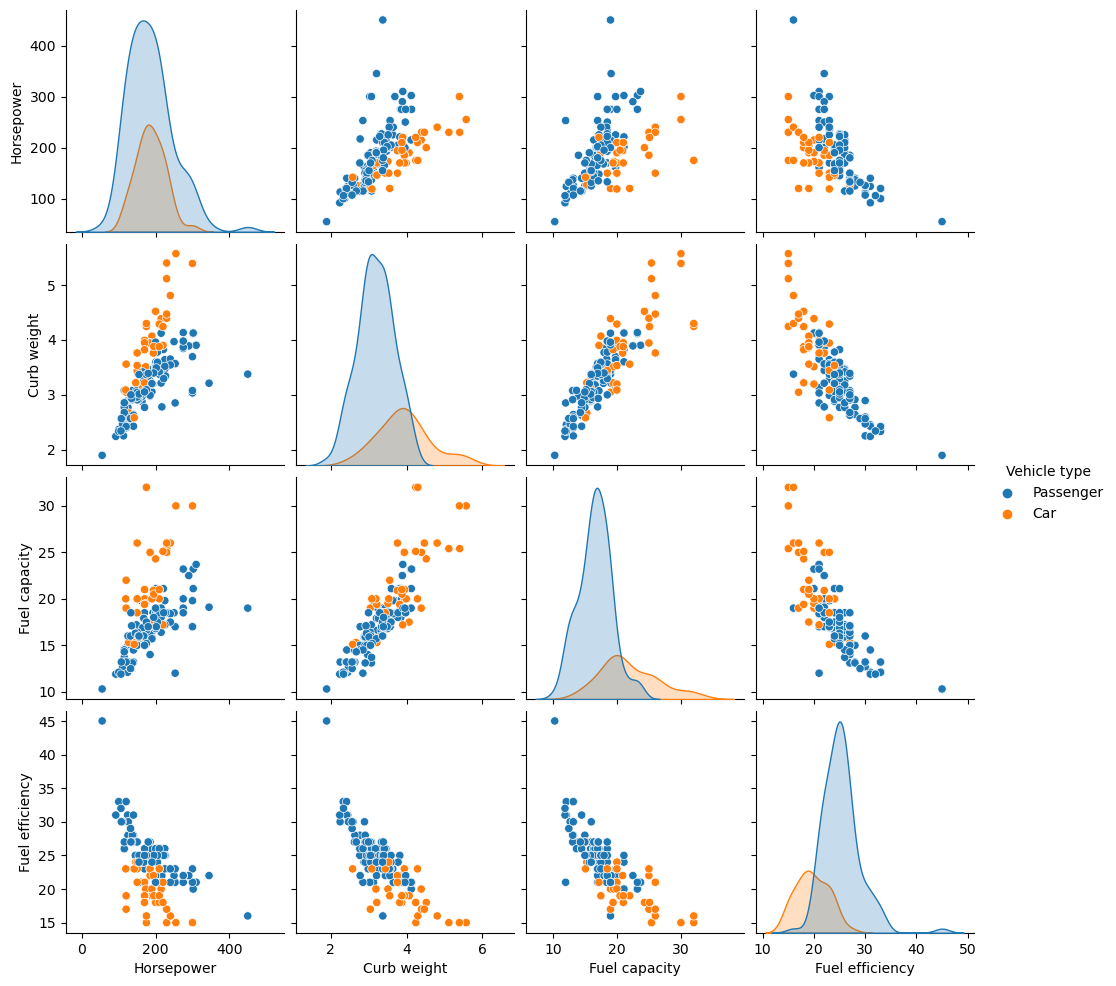

In [68]:
sns.pairplot(dataset_cars[['Horsepower','Curb weight', 'Fuel capacity','Fuel efficiency','Vehicle type']],hue='Vehicle type')

<AxesSubplot:xlabel='Fuel efficiency', ylabel='Vehicle type'>

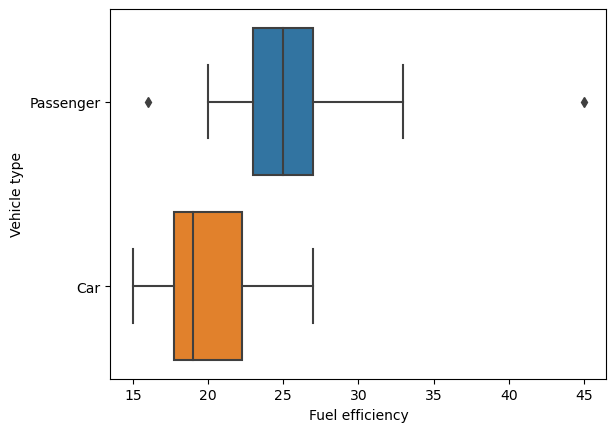

In [72]:
sns.boxplot(data=dataset_cars,y='Vehicle type', x='Fuel efficiency')

<AxesSubplot:xlabel='Fuel efficiency', ylabel='Vehicle type'>

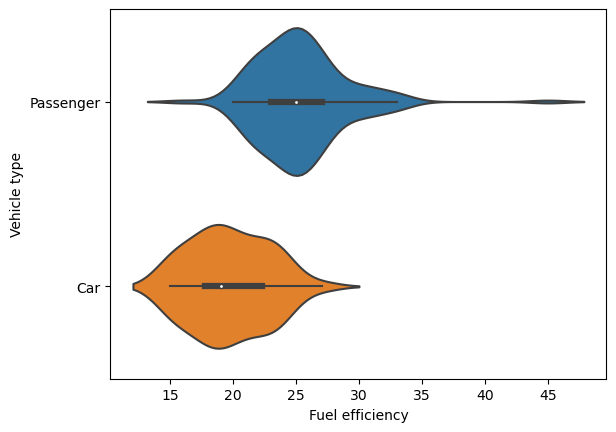

In [73]:
sns.violinplot(data=dataset_cars,y='Vehicle type', x='Fuel efficiency')